# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | craon
Processing Record 2 of Set 1 | takamaka
City not found. Skipping...
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | solnechnyy
Processing Record 5 of Set 1 | lazaro cardenas
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | akrehamn
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | kapa'a
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | port-vila
Processing Record 13 of Set 1 | dhidhdhoo
Processing Record 14 of Set 1 | port blair
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | santa maria da vitoria
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | igarka
Processing Record 21 o

Processing Record 40 of Set 4 | thunder bay
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | puerto madryn
Processing Record 43 of Set 4 | zinder
Processing Record 44 of Set 4 | mount pearl
Processing Record 45 of Set 4 | hermanus
Processing Record 46 of Set 4 | ekuvukeni
Processing Record 47 of Set 4 | kuressaare
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | inirida
Processing Record 0 of Set 5 | brunico
Processing Record 1 of Set 5 | happy valley-goose bay
Processing Record 2 of Set 5 | susuman
Processing Record 3 of Set 5 | nar'yan-mar
Processing Record 4 of Set 5 | kiruna
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | manta
Processing Record 7 of Set 5 | shingu
Processing Record 8 of Set 5 | vilyuchinsk
Processing Record 9 of Set 5 | indaiatuba
Processing Record 10 of Set 5 | bel ombre
Processing Record 11 of Set 5 | ceres
Processing Record 12 of Set 5 | dolores
Processing Record 13 of Set 5 | mahanoro
Proces

Processing Record 33 of Set 8 | mount gambier
Processing Record 34 of Set 8 | puerto san jose
Processing Record 35 of Set 8 | santo antonio do leverger
Processing Record 36 of Set 8 | tralee
Processing Record 37 of Set 8 | anna regina
Processing Record 38 of Set 8 | port lincoln
Processing Record 39 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 40 of Set 8 | fort mcmurray
Processing Record 41 of Set 8 | new norfolk
Processing Record 42 of Set 8 | esmeralda
Processing Record 43 of Set 8 | saudarkrokur
Processing Record 44 of Set 8 | pativilca
Processing Record 45 of Set 8 | mata-utu
Processing Record 46 of Set 8 | thai binh
Processing Record 47 of Set 8 | kingscliff
Processing Record 48 of Set 8 | el hadjira
Processing Record 49 of Set 8 | makar'yev
Processing Record 0 of Set 9 | masuguru
Processing Record 1 of Set 9 | kiunga
Processing Record 2 of Set 9 | cunit
Processing Record 3 of Set 9 | aibak
Processing Record 4 of Set 9 | grootfontein
Processing Record 5 of 

Processing Record 26 of Set 12 | kirensk
Processing Record 27 of Set 12 | olgii
City not found. Skipping...
Processing Record 28 of Set 12 | benghazi
Processing Record 29 of Set 12 | essaouira
Processing Record 30 of Set 12 | ha'il
Processing Record 31 of Set 12 | columbio
Processing Record 32 of Set 12 | saskatoon
Processing Record 33 of Set 12 | callao
Processing Record 34 of Set 12 | contamana
Processing Record 35 of Set 12 | morehead city
Processing Record 36 of Set 12 | stephenville
Processing Record 37 of Set 12 | louis trichardt
Processing Record 38 of Set 12 | baganga
Processing Record 39 of Set 12 | akureyri
Processing Record 40 of Set 12 | bodaybo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,craon,47.8469,-0.9493,9.32,93,100,6.34,FR,1703811316
1,waitangi,-43.9535,-176.5597,14.66,77,100,10.19,NZ,1703811317
2,solnechnyy,50.7214,136.6319,-20.03,86,74,1.42,RU,1703811317
3,lazaro cardenas,17.9583,-102.2000,23.91,75,0,2.97,MX,1703811317
4,grytviken,-54.2811,-36.5092,0.42,97,100,3.93,GS,1703811317


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,craon,47.8469,-0.9493,9.32,93,100,6.34,FR,1703811316
1,waitangi,-43.9535,-176.5597,14.66,77,100,10.19,NZ,1703811317
2,solnechnyy,50.7214,136.6319,-20.03,86,74,1.42,RU,1703811317
3,lazaro cardenas,17.9583,-102.2000,23.91,75,0,2.97,MX,1703811317
4,grytviken,-54.2811,-36.5092,0.42,97,100,3.93,GS,1703811317


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

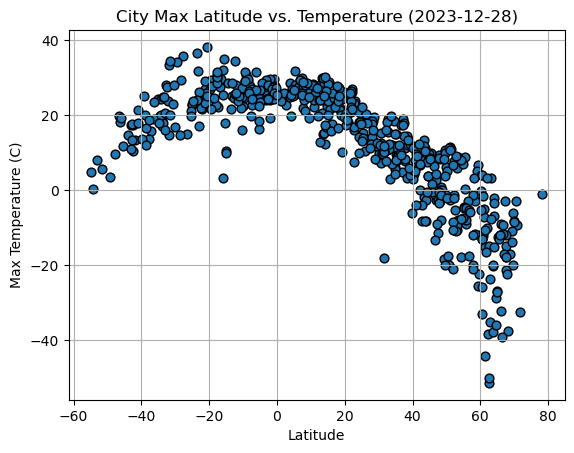

In [9]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
Fig1 = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", edgecolors="black", s=40, grid=True, xlabel="Latitude", 
                         ylabel="Max Temperature (C)", title="City Max Latitude vs. Temperature (2023-12-28)")            

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

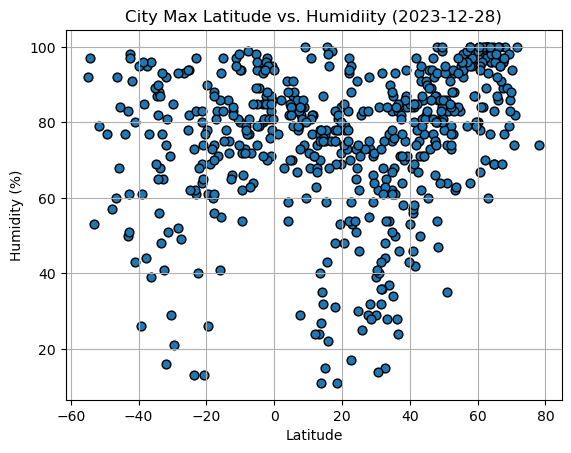

In [10]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
Fig2 = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", edgecolors="black", s=40, grid=True, xlabel="Latitude", 
                         ylabel="Humidity (%)", title="City Max Latitude vs. Humidiity (2023-12-28)")            


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

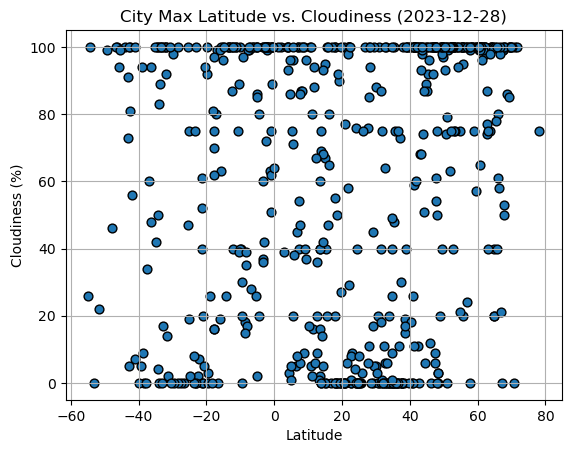

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
Fig3 = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", edgecolors="black", s=40, grid=True, xlabel="Latitude", 
                         ylabel="Cloudiness (%)", title="City Max Latitude vs. Cloudiness (2023-12-28)")            


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

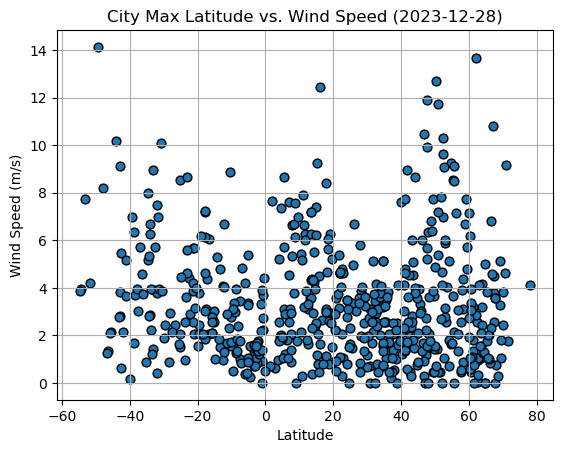

In [12]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
Fig4 = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", edgecolors="black", s=40, grid=True, xlabel="Latitude", 
                         ylabel="Wind Speed (m/s)", title="City Max Latitude vs. Wind Speed (2023-12-28)")            


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,craon,47.8469,-0.9493,9.32,93,100,6.34,FR,1703811316
2,solnechnyy,50.7214,136.6319,-20.03,86,74,1.42,RU,1703811317
3,lazaro cardenas,17.9583,-102.2000,23.91,75,0,2.97,MX,1703811317
5,akrehamn,59.2667,5.1833,6.67,87,100,7.72,NO,1703811318
7,kapa'a,22.0752,-159.3190,26.99,93,100,4.63,US,1703811318


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,14.66,77,100,10.19,NZ,1703811317
4,grytviken,-54.2811,-36.5092,0.42,97,100,3.93,GS,1703811317
6,avarua,-21.2078,-159.7750,27.03,69,40,5.66,CK,1703811318
9,invercargill,-46.4000,168.3500,18.34,92,100,1.34,NZ,1703811319
10,port-vila,-17.7338,168.3219,29.78,74,75,7.20,VU,1703811319


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8635653909471909


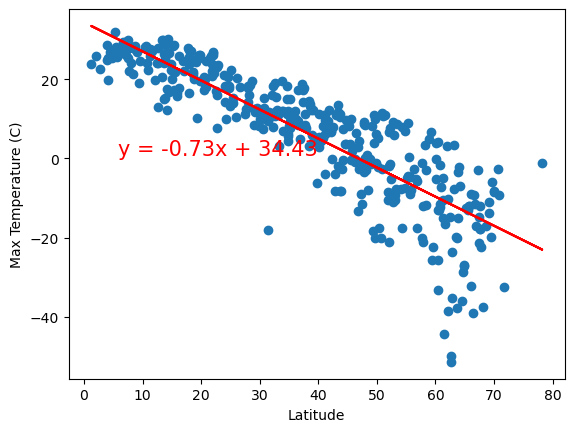

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5602007749130593


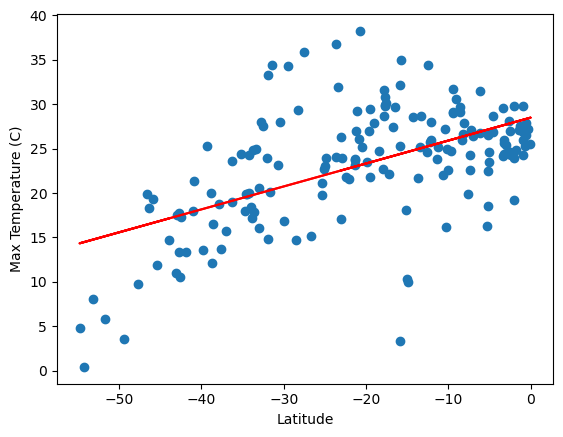

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The latitude has a strong correlation with Max Temperature (C) as the r-value of the northern hemisphere is -0.77 while the r-value of the southern hempisphere is 0.82.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3796554730294025


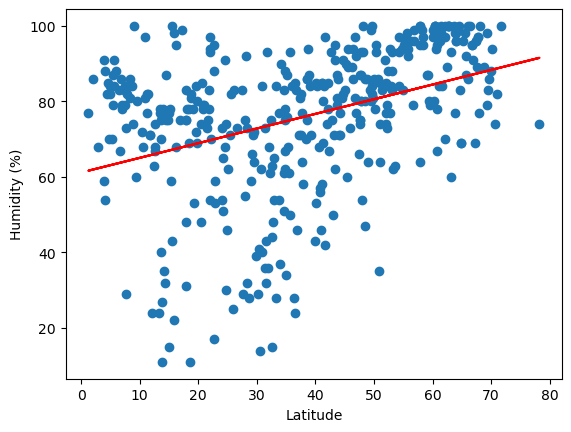

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.22592730746940218


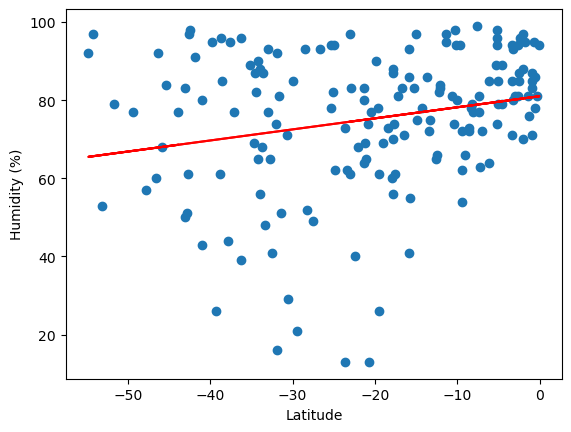

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The data shows that latitude has very little affect on humidity as both r-values are very close to zero, whcih means there is no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3410289295302952


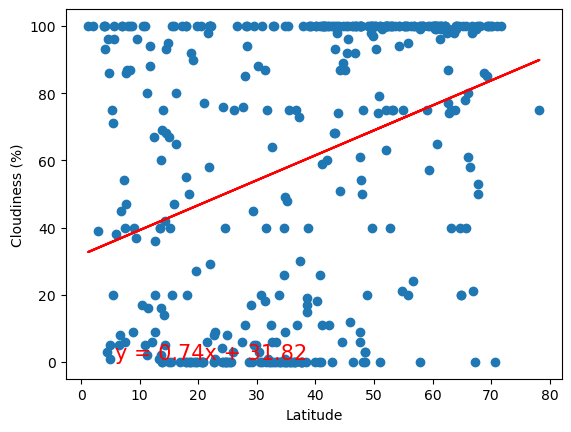

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.16739737666164575


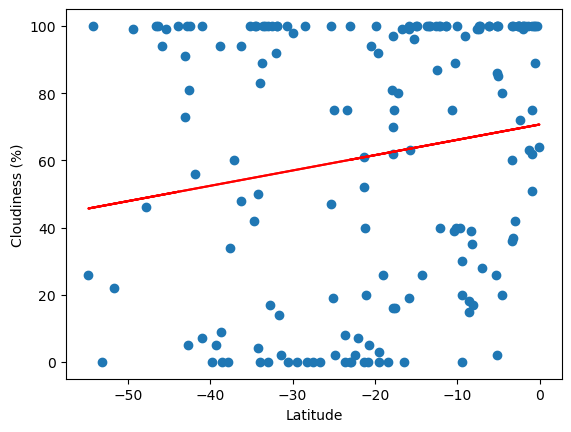

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The data shows that latitude has very little affect on cloudiness as bother r-values are very close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03166843149334026


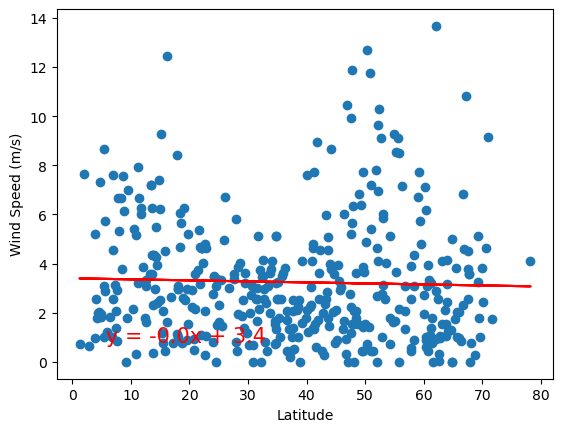

In [22]:
# Northern Hemisphere


The r-value is: -0.40968443596778603


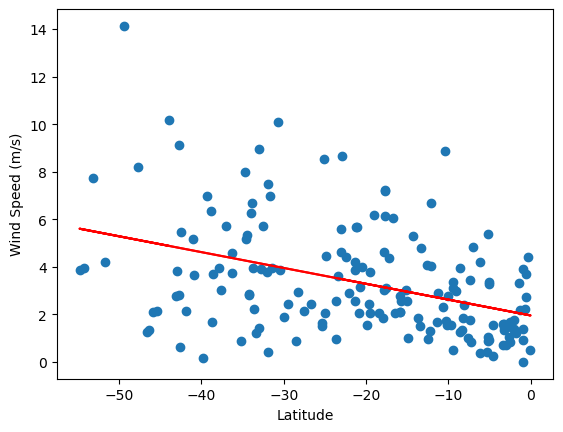

In [23]:
# Southern Hemisphere



**Discussion about the linear relationship:** the data shows that latitude has very little affect on wind speed as both r-values are close to zero.